In [1]:
import sys; import matplotlib.pyplot as plt; import numpy as np
import xarray as xr; import pandas as pd; import datetime as dt
  
# adding my module folders to the system path
#sys.path.insert(0, '/media/mydrive/PhysOc/DataFinder/')
#import PISTON_Data 

sys.path.insert(0, '/media/mydrive/PhysOc/modview/modview/')
import timetools
import loader

Nuestro objetivo es crear una instancia de la classe loader.assemble() que albergue los datos de la boya SIO1 (134.7 E, 12.3 N, Sep 2018 - Oct 2019).

Nota: clases en python son cruciales para estandarizar nuestro trabajo. Estandarizar estructuras de folder, y nomenclatura de archivos es clave para acelerar el proces.

In [14]:
# Define identity of class instance we will use as example
sio1_limits = {'t0':'2018 Sep 11','t1':'2018 Oct 20','z0':0,'z1':750}
sio1_id = {'name':'SIO1','type':'mooring','project':'PISTON',
          'limits':sio1_limits};
sio1_datadir = '/media/mydrive/PISTON/Moorings/SIO1/ADCP/'
adcpnames = ['SIO1_3160.nc','SIO1_4021.nc','SIO1_11181.nc']
sio1_paths = [sio1_datadir + fp for fp in adcpnames]
SIO1 = loader.assemble(sio1_id, sio1_paths)

In [15]:
#Load all adcp files into SIO1
SIO1.storevar(sio1_paths,'u')

Interpolate data onto a new grid. 
Development example code is below

In [16]:
# -------------------     New axes     -----------------------
ndays = 365
# List full of datetime objects for 1st axis
time = [dt.datetime.strptime('2018 Sep 15','%Y %b %d') \
        + dt.timedelta(days=kk) for kk in range(ndays)] ;
# Numpy array 2nd axis
z = np.concatenate(
            [np.arange(50,210,10), np.arange(225,775,25)])
grid_example = {'time':time, 'z':z } 
vars_example = ['u']

In [36]:
# -------------------  Call method ---------------------------
SIO1.storevar( sio1_paths, 'u');
SIO1.interp_grid(vars_example,'z') 

In [114]:
# Reload modules being developed
import importlib
importlib.reload(loader); importlib.reload(timetools);

In [115]:
# Now load a temperature grid and turn into xarray object
tgrid = loader.openmat('/home/noel/Documents/PISTON/Moorings/SIO1/SIO1_Tgrid.mat')

In [120]:
temp = loader.mat2xr(tgrid,['temp'],['depth','time'],
                     struct_name='SIO1');

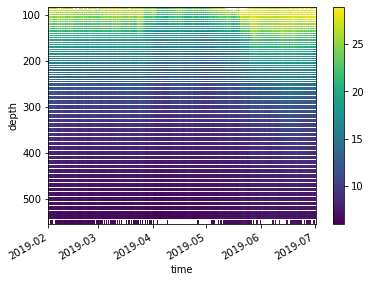

In [121]:
temp.sel(time=slice('2019-02-01','2019-07-01')).plot(yincrease=False)

In [ ]:
adcp_1 = SIO1.retrieve(sio1_paths[0], 'netcdf')
adcp_1 = adcp_1.sel(time=slice(sio1_limits['t0'],sio1_limits['t1']))
adcp_1['u'].plot(yincrease=False)

<ipython-input-124-affae91d6802>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh( temp2.time, temp2.depth, temp2.values)


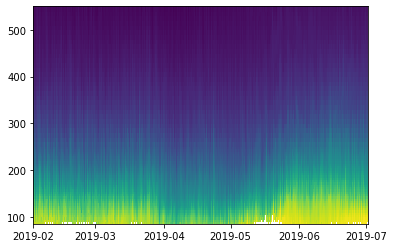

In [124]:
temp = temp.interpolate_na('depth');
temp2 = temp.sel(time=slice('2019-02-01','2019-07-01'));
plt.pcolormesh( temp2.time, temp2.depth, temp2.values)
plt.ylim(())

In [ ]:
sio1_paths[0]